In [2]:
import pandas as pd

In [228]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [16]:
df=pd.read_csv('data/travel_data.csv')

In [7]:
df.head(2)

,SEQ_NO,ALL_KWRD_RANK_CO,SRCHWRD_NM,UPPER_CTGRY_NM,LWPRT_CTGRY_NM,CNTT_NM,COUNTRY_NM,MOBILE_SCCNT_VALUE,PC_SCCNT_VALUE,SCCNT_SM_VALUE,SCCNT_DE
0,15744,1,일본여행,여행,해외여행,아시아,일본,5294,1850,7144,20190701
1,15745,2,대만여행,여행,해외여행,아시아,대만,4960,842,5802,20190701


In [17]:
df=df.rename(columns={'SEQ_NO':'일렬번호','ALL_KWRD_RANK_CO':'키워드 순위','SRCHWRD_NM':'검색어명','UPPER_CTGRY_NM':'카테고리(상)','LWPRT_CTGRY_NM':'카테고리(하)','CNTT_NM':'대륙','COUNTRY_NM':'국가','MOBILE_SCCNT_VALUE':'모바일 검색량','PC_SCCNT_VALUE':'PC 검색량','SCCNT_SM_VALUE':'총 검색량','SCCNT_DE':'검색일자'})

In [11]:
df.head(2)

,일렬번호,키워드 순위,검색어명,카테고리(상),카테고리(하),대륙,국가,모바일 검색량,PC 검색량,총 검색량,검색일자
0,15744,1,일본여행,여행,해외여행,아시아,일본,5294,1850,7144,20190701
1,15745,2,대만여행,여행,해외여행,아시아,대만,4960,842,5802,20190701


In [21]:
df['검색일자']=df['검색일자'].astype(str).str[:6].apply(lambda x: x[:4] + '-' + x[4:])

In [22]:
df.head(2)

,일렬번호,키워드 순위,검색어명,카테고리(상),카테고리(하),대륙,국가,모바일 검색량,PC 검색량,총 검색량,검색일자
0,15744,1,일본여행,여행,해외여행,아시아,일본,5294,1850,7144,2019-07
1,15745,2,대만여행,여행,해외여행,아시아,대만,4960,842,5802,2019-07


In [113]:
df['국가'].nunique()

49

In [123]:
df['총 검색량']==0

0        False
1        False
2        False
3        False
4        False
         ...  
23853    False
23854    False
23855    False
23856    False
23857    False
Name: 총 검색량, Length: 23858, dtype: bool

In [136]:
df[df['총 검색량'] == 0]

,일렬번호,키워드 순위,검색어명,카테고리(상),카테고리(하),대륙,국가,모바일 검색량,PC 검색량,총 검색량,검색일자
23518,24136,1,괌여행,여행,해외여행,오세아니아,미국,0,0,0,2025-01
23519,24137,2,칸여행,여행,해외여행,유럽,프랑스,0,0,0,2025-01
23520,24138,3,계림여행,여행,해외여행,아시아,중국,0,0,0,2025-01
23521,24139,4,고아여행,여행,해외여행,아시아,인도,0,0,0,2025-01
23522,24140,5,곤명여행,여행,해외여행,아시아,중국,0,0,0,2025-01
23523,24141,6,교토여행,여행,해외여행,아시아,일본,0,0,0,2025-01
23524,24142,7,규슈여행,여행,해외여행,아시아,일본,0,0,0,2025-01
23525,24143,8,냐짱여행,여행,해외여행,아시아,베트남,0,0,0,2025-01
23526,24144,9,네팔여행,여행,해외여행,아시아,네팔,0,0,0,2025-01
23527,24145,10,뉴욕여행,여행,해외여행,북아메리카,미국,0,0,0,2025-01


In [23]:
df['키워드 순위'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [33]:
df['검색일자'].unique()

array(['2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12',
       '2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06',
       '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12',
       '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06',
       '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12',
       '2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06',
       '2022-07', '2022-08', '2022-09', '2022-10', '2022-11', '2022-12',
       '2023-01', '2023-02', '2023-03', '2023-04', '2023-05', '2023-06',
       '2023-07', '2023-08', '2023-09', '2023-10', '2023-11', '2023-12',
       '2024-01', '2024-02', '2024-03', '2024-04', '2024-05', '2024-06',
       '2024-07', '2024-08', '2024-09', '2024-10', '2024-11', '2024-12',
       '2025-01', '2025-02'], dtype=object)

In [27]:
df.loc[:,['키워드 순위','검색어명']]

,키워드 순위,검색어명
0,1,일본여행
1,2,대만여행
2,3,후쿠오카여행
3,4,블라디보스톡여행
4,5,오사카여행
...,...,...
23853,6,싱가포르여행
23854,7,오사카여행
23855,8,도쿄여행
23856,9,발리여행


In [ ]:

# 검색일자와 검색어명으로 그룹화하고 검색량 합계 계산
grouped = df.groupby(['검색일자', '검색어명'])['총 검색량'].sum().reset_index()

# 각 검색일자에서 검색량이 가장 높은 검색어 선택
result = grouped.loc[grouped.groupby('검색일자')['총 검색량'].idxmax()]

# 결과 출력 (검색일자 순으로 정렬)
result=result.sort_values('검색일자')

,검색일자,검색어명,총 검색량
13,2019-07,일본여행,522855
30,2019-08,일본여행,246879
51,2019-09,피지여행,311329
55,2019-10,대만여행,247156
71,2019-11,대만여행,290414
...,...,...,...
1131,2024-10,대만여행,486287
1153,2024-11,일본여행,312265
1173,2024-12,일본여행,401781
1197,2025-01,일본여행,255998


In [101]:
import matplotlib.pyplot as plt
import seaborn as sb

In [100]:
result

,검색일자,검색어명,총 검색량
13,2019-07,일본여행,522855
30,2019-08,일본여행,246879
51,2019-09,피지여행,311329
55,2019-10,대만여행,247156
71,2019-11,대만여행,290414
...,...,...,...
1131,2024-10,대만여행,486287
1153,2024-11,일본여행,312265
1173,2024-12,일본여행,401781
1197,2025-01,일본여행,255998


In [138]:
df.pivot_table(values='총 검색량', index='검색일자', columns='검색어명', aggfunc='sum', fill_value=0)

검색어명,계림여행,고아여행,곤명여행,괌여행,광저우여행,교토여행,규슈여행,그리스여행,나고야여행,냐짱여행,...,푸껫여행,푸꾸옥여행,프랑스여행,피지여행,필리핀여행,하와이여행,하코네여행,호주여행,홍콩여행,후쿠오카여행
검색일자,,,,,,,,,,,,,,,,,,,,,
2019-07,0,0,0,53503,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,152340,49279
2019-08,0,0,0,58356,0,0,0,0,0,0,...,0,0,0,0,0,5713,0,0,125462,0
2019-09,0,0,0,48857,2533,0,0,0,0,0,...,0,0,0,311329,0,0,0,0,76483,0
2019-10,0,0,0,74988,0,0,0,0,0,0,...,0,0,0,12836,0,0,0,0,70756,0
2019-11,0,0,0,90343,0,0,0,0,0,0,...,0,0,0,0,0,3117,0,0,74843,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10,0,0,0,0,0,22107,0,0,0,0,...,0,3361,0,0,0,0,0,0,299110,358932
2024-11,0,0,0,0,0,0,0,0,0,0,...,0,2902,0,0,0,0,0,0,166776,211082
2024-12,0,0,0,1298,0,1584,0,0,0,0,...,0,0,0,0,0,0,0,0,224111,223130


In [149]:
df.groupby('검색일자')['총 검색량'].sum()

검색일자
2019-07    1768685
2019-08    1334747
2019-09    1333092
2019-10    1149806
2019-11    1286792
            ...   
2024-10    2983602
2024-11    1848883
2024-12    2193269
2025-01    1417308
2025-02     512940
Name: 총 검색량, Length: 68, dtype: int64

In [157]:
result = df.groupby('검색일자')['총 검색량'].sum().reset_index()
result['연도'] = result['검색일자'].astype(str).str[:4]
result_2024 = result[result['연도'] == '2024']
result_sorted = result_2024.sort_values('총 검색량', ascending=False)

In [166]:
result_sorted

,검색일자,총 검색량,연도
54,2024-01,3955164,2024
60,2024-07,3247518,2024
61,2024-08,3086194,2024
56,2024-03,3061126,2024
63,2024-10,2983602,2024
55,2024-02,2971390,2024
58,2024-05,2969031,2024
59,2024-06,2855155,2024
62,2024-09,2672629,2024
57,2024-04,2623602,2024


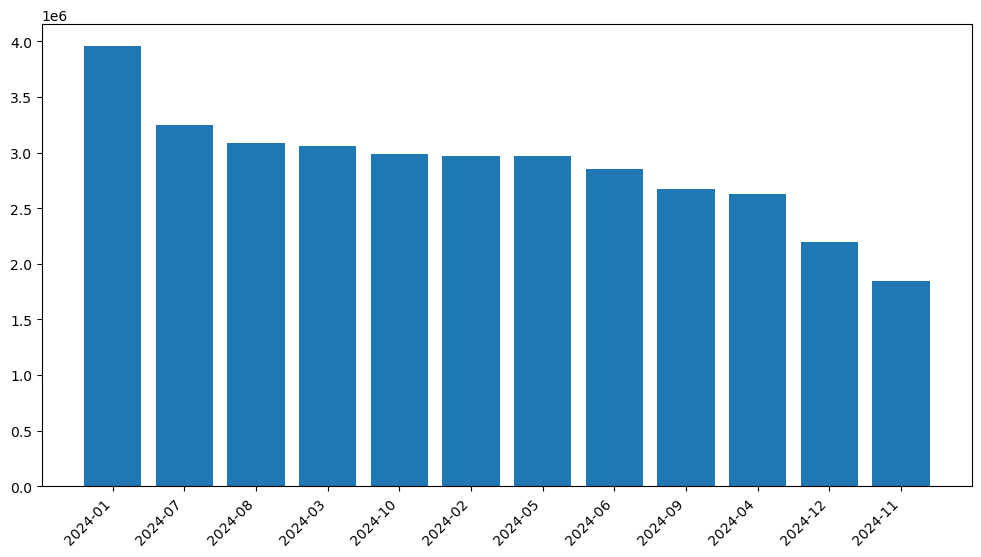

In [165]:
plt.figure(figsize=(12, 6))
plt.bar(result_sorted['검색일자'].astype(str), result_sorted['총 검색량'])
plt.xticks(rotation=45, ha='right')
plt.show()

In [168]:
df['연도']=df['검색일자'].astype(str).str[:4]

In [196]:
yearly_totals = df.groupby('연도')['총 검색량'].sum().reset_index()
yearly_totals = yearly_totals.sort_values('연도')

In [198]:
yearly_totals=yearly_totals[yearly_totals['연도']<='2024']

c:\Users\USER\anaconda3\envs\hi\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44160 (\N{HANGUL SYLLABLE GEOM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\envs\hi\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49353 (\N{HANGUL SYLLABLE SAEG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\envs\hi\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\envs\hi\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


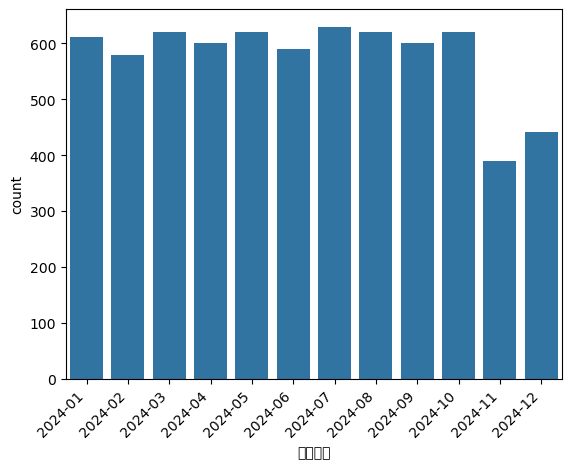

In [176]:
plt.Figure(figsize=(10,12))
sb.countplot(data=result,x='검색일자')
plt.xticks(rotation=45, ha='right')
plt.show()

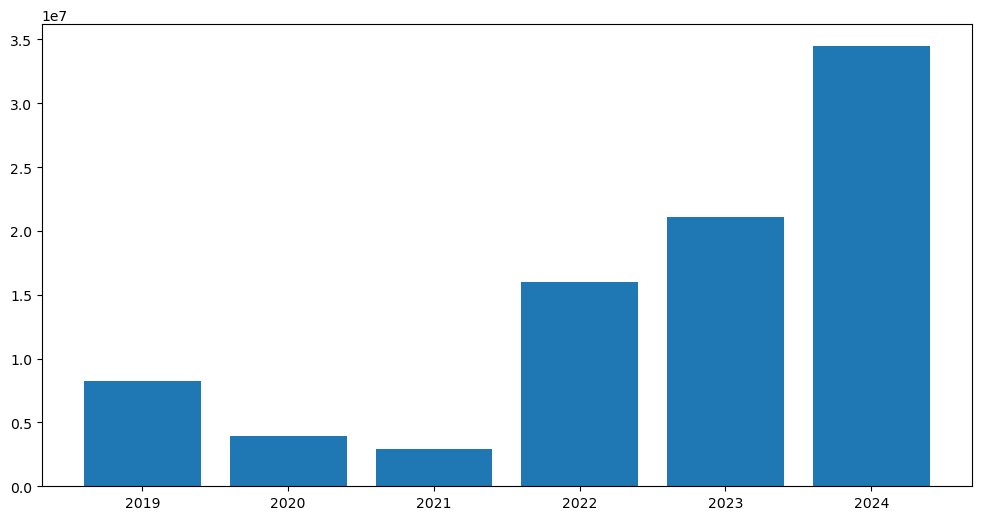

In [199]:
plt.subplots(figsize=(12, 6))
plt.bar(yearly_totals['연도'], yearly_totals['총 검색량'])
plt.show()


In [211]:
result=df.groupby('검색어명')['총 검색량'].sum().reset_index()

In [224]:
result=result.sort_values('총 검색량',ascending=False).head(10).reset_index(drop='index')

In [225]:
result

,검색어명,총 검색량
0,일본여행,18981054
1,대만여행,10857674
2,베트남여행,8560627
3,후쿠오카여행,7245008
4,싱가포르여행,7144057
5,오사카여행,6016865
6,태국여행,5282189
7,도쿄여행,4791093
8,홍콩여행,3967102
9,발리여행,2228968


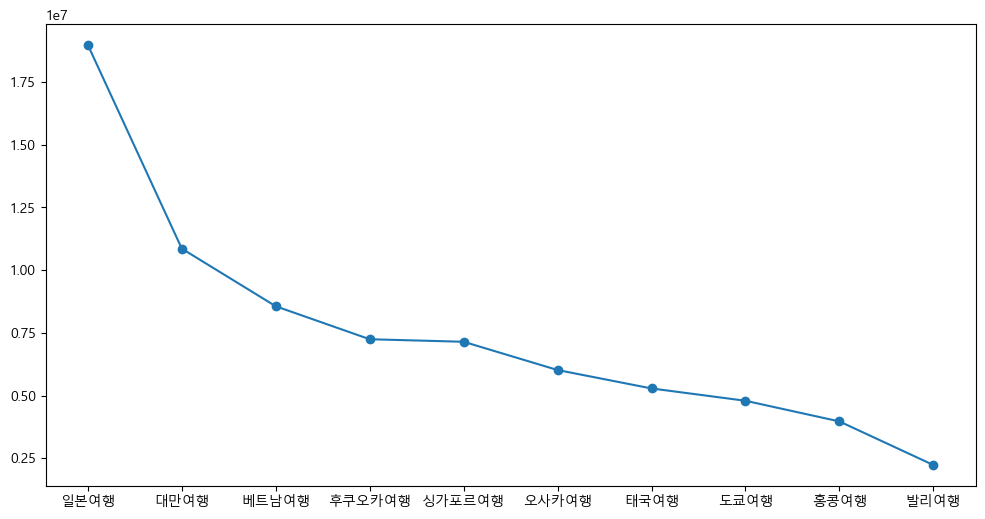

In [229]:
plt.subplots(figsize=(12, 6))
plt.plot(result['검색어명'], result['총 검색량'], marker='o')
plt.show()